In [197]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

'''
ACDH
I M Velicer
1 Aug 2018
'''
 
#generate combined data tables 

df1 = pd.read_csv('/Users/IMYV/Desktop/cfdb-django/data/tablets.csv', usecols=['title', 'region', 'period', 'Year', 'scribe'], engine='python')
df2 = pd.read_csv('/Users/IMYV/Desktop/cfdb-django/data/glyphs.csv', usecols=['tablet', 'sign', 'image'], engine='python')
df3 = pd.read_csv('/Users/IMYV/Desktop/cfdb-django/data/stdSigns.csv', usecols=['sign_name', 'image'], engine='python')

for img in df3.iloc[:,1]:
    if img.endswith(".bmp") or img.endswith(".png") or img.endswith(".jpg"):
        name = img.split('.')
        df3.replace({'image': img}, name[0]+'.png', inplace=True)

df4 = df1.merge(df2, left_on='title', right_on='tablet', how='right')
df5 = df4.drop(['tablet'], axis=1)

df6 = df5.merge(df3, left_on='sign', right_on='sign_name', how='right')
df7 = df6.drop(['sign_name'], axis=1)
df8 = df7.rename(index=str, columns={"title": "tablet", "Year": "year", "image_x": "glyph", "image_y": "std_sign"})
df9 = df8.sort_values('std_sign')
    
#print number of glyphs per sign
df9 = df9.rename(index=str, columns={"glyph": "glyph_img"})
'''      
for img in df9.iloc[:,7]:
    if img.endswith(".bmp") or img.endswith(".png") or img.endswith(".jpg"):
        name = img.split('.')
        df9.replace({'std_sign': img}, name[0]+'.png', inplace=True)
'''         

df9.iloc[:,[6,7]].to_csv('glyphs-aligned-w-std_sign-images.csv')

In [198]:
df9

,tablet,region,scribe,period,year,sign,glyph_img,std_sign
6280,YBC 3504,Uruk,n/a,nb,562.0,HAL,777a217b-08bf-4a3e-9d56-8d833704629c.png,sign_002.png
6287,BM 95512,Babylon,n/a,achaemenid,373.0,HAL,12c02f0b-0d15-4f6d-86ac-d91772e1ca3f.png,sign_002.png
6286,YOS 6 155,Uruk,Nādinu/Bēl-ahhē-iqīša//Egibi,nb,544.0,HAL,06948e43-3080-4318-979c-809ec1de90a0.png,sign_002.png
6285,YOS 21 198,Uruk,n/a,achaemenid,522.0,HAL,75ff1ab1-32c2-4b1e-82d5-f61a2607ae87.png,sign_002.png
6284,CT 49 159,Babylon,n/a,peri_parthian,94.0,HAL,b52067a4-ff59-4d36-8875-bd3e84193611.png,sign_002.png
6283,YOS 6 100,Uruk,Šamaš-zēru-iddin/Bēl-ahu-iddin//Mukallim,nb,551.0,HAL,0139c8cb-6f44-48f4-8b35-fa96f0edc7f5.png,sign_002.png
6282,YBC 11390,Uruk,Širikti-Marduk/Ibni-Ištar,enb,659.0,HAL,156bfb5a-2037-4350-b692-7f7fa67c0881.png,sign_002.png
6281,BM 87228,Babylon,[x]/Nabû-ittannu,achaemenid,370.0,HAL,dfffce1b-b263-4a36-b9b3-d3f13487eeed.png,sign_002.png
6279,YOS 19 76,Uruk,Innin-šumu-uṣur/Nergal-ušēzib//Kidin-MardukŠum...,nb,551.0,HAL,a255d6e2-b79a-4c40-b56e-f025cb9c0454.png,sign_002.png
1237,BM 25625,Borsippa,Nabû-zēru-līšir/Nabû-zēru-iddini//Iddin-Papsukkal,nb,545.0,BA,6ed03fc4-9dbf-4b05-8cde-8ffa40780b7a.png,sign_005.png


In [201]:
#count number of glyphs
print("number of glyphs: ", df2.shape[0])

#create table of number of glyphs per sign
df10 = df9.set_index(["tablet", "region", "period", "year", "sign", "std_sign"]).count(level="std_sign")
df10.to_csv('glyph_count.csv')
df11 = pd.read_csv('/Users/IMYV/Desktop/cfdb-django/glyph_count.csv', engine='python')

df12 = df11.merge(df3, left_on='std_sign', right_on='image', how='left')
#df12 = df12.merge(df9.drop(['tablet', 'region', 'scribe', 'period', 'year', 'sign', 'std_sign'], axis=1), left_on='std_sign', right_on='glyph', how='right')
df12 = df12.drop(['scribe', 'image'], axis=1)

#count number of signs
df13 = df12.count(axis=0)
print("number of signs: ", df13[0])
print("")

number of glyphs:  6494
           std_sign  glyph_img sign_name
0      sign_002.png          9       HAL
1      sign_005.png         81        BA
2      sign_006.png         25        ZU
3      sign_007.png         55        SU
4      sign_009.png         15       BAL
5       sign_01.png          8        AŠ
6      sign_012.png         34       TAR
7      sign_013.png         44        AN
8      sign_015.png         50        KA
9      sign_050.png         22      ARAD
10     sign_052.png         79       ITU
11     sign_054.png          1    BURU14
12     sign_058.png         67        TU
13     sign_059.png         39        LI
14     sign_060.png         25       PAP
15     sign_061.png         95        MU
16     sign_063.png          9       KÁD
17     sign_067.png          2       GIL
18     sign_068.png         57        RU
19     sign_070.png        130       NaN
20     sign_073.png         69        TI
21     sign_074.png         54       BAR
22     sign_076.png          2   

            std_sign  glyph_img sign_name
125     sign_353.png          0        ŠA
11      sign_054.png          1    BURU14
196     sign_560.png          1     NAGAR
197     sign_563.png          1       NIK
37      sign_109.png          1       LÀL
134     sign_373.png          1       SUD
176     sign_480.png          1       DIŠ
40      sign_113.png          1       SU4
206     sign_583.png          1     EDURU
128     sign_356.png          1       SA6
62   sign_151544.png          1     AŠGAB
92      sign_255.png          1        ÙR
91      sign_252.png          1     SILA4
90      sign_237.png          1       AMA
158     sign_434.png          1       TÙM
71      sign_176.png          1     NÍNDA
156     sign_430.png          1      GIR4
154     sign_425.png          1       KIŠ
117     sign_336.png          2       LIL
43      sign_122.png          2        ÙZ
76      sign_203.png          2        ÚR
34      sign_103.png          2       MÙŠ
177     sign_483.png          2   

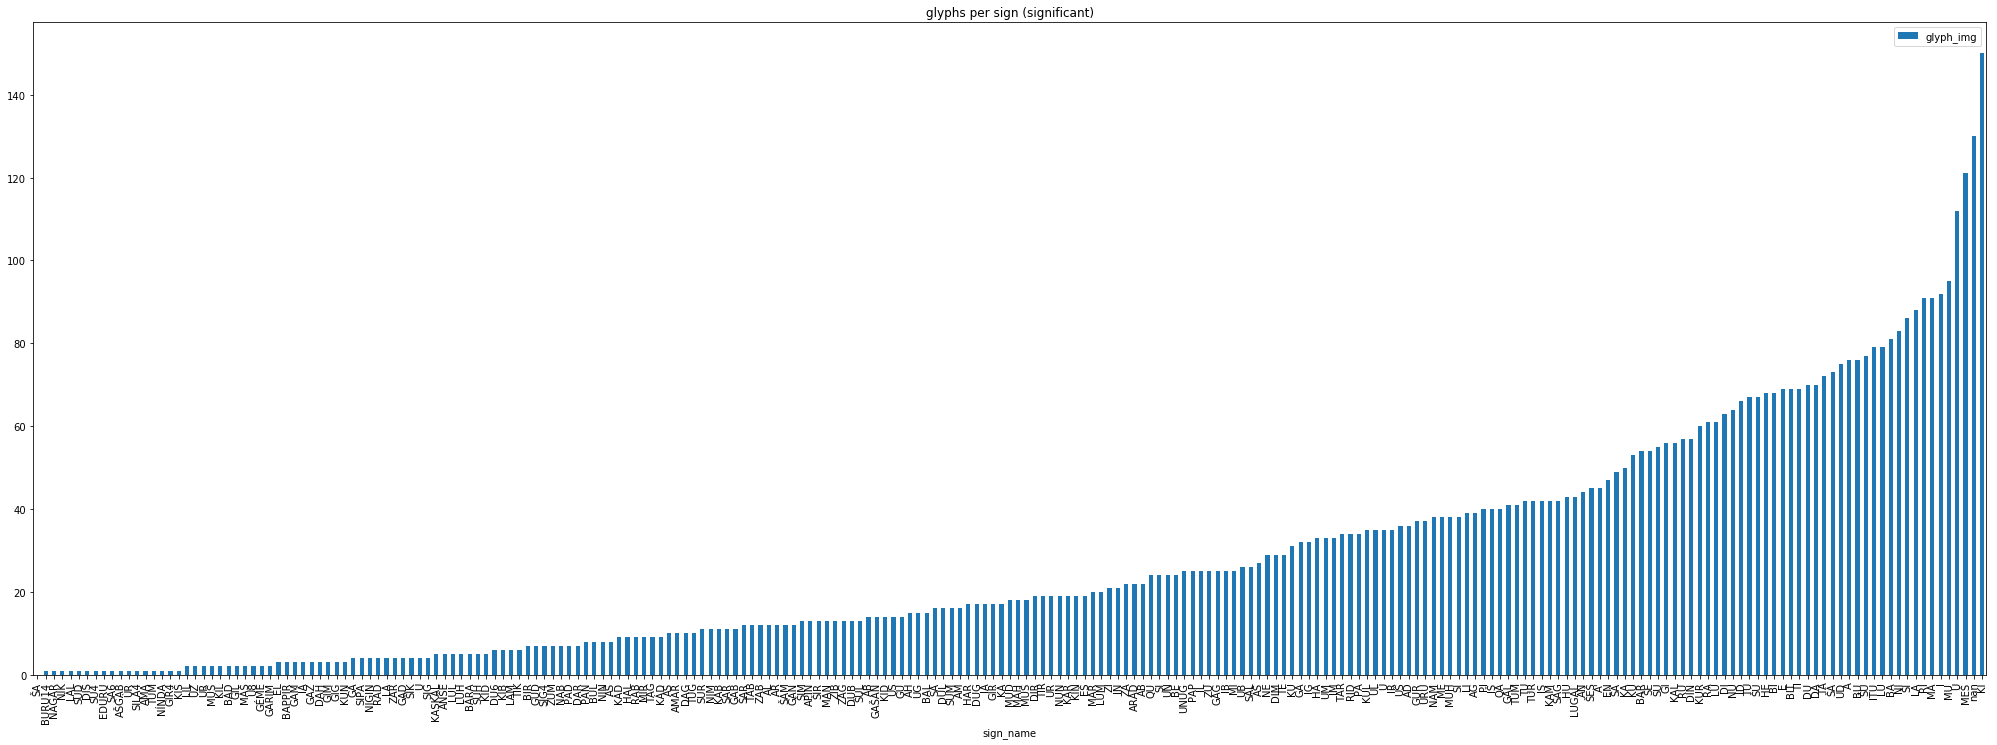

In [202]:
#plot number of glyphs per sign
%matplotlib inline
df12 = df12.sort_values(by=['glyph_img'])
print(df12)
df12.iloc[0:235].plot(x='sign_name', y='glyph_img', kind='bar', figsize=[35,12], title = 'glyphs per sign (significant)')

In [203]:
#tablet data: number of tablets, glyphs per tablet, signs per tablet

df15 = df9.sort_values(by=['tablet', 'std_sign'])
df16 = df15.groupby(['tablet']).nunique()
df16 = df16.drop(['tablet', 'region', 'period', 'year', 'sign', 'scribe'], axis=1)
print("number of tablets: ", df16.count(axis=0)[1])
print("")
print(df16)

%matplotlib inline
df16.to_csv('glyphs_per_tablet.csv')
df16 = pd.read_csv('/Users/IMYV/Desktop/cfdb-django/glyphs_per_tablet.csv', engine='python')
df16 = df16.sort_values(by=['glyph'])
df16.iloc[250:352].plot(x='tablet', y='glyph_img', kind='bar', figsize=[35,12], title = 'glyphs per tablet (significant)')

print("mean glyphs per tablet: ", df16['glyph_img'].mean())
print("min glyphs per tablet: ", df16['glyph_img'].min())
print("max glyphs per tablet: ", df16['glyph_img'].max())
print("")
print("mean signs per tablet: ", df16['std_sign'].mean())
print("min signs per tablet: ", df16['std_sign'].min())
print("max signs per tablet: ", df16['std_sign'].max())

number of tablets:  352

             glyph_img  std_sign
tablet                          
AD -105A            32        31
AD -132B            65        56
AD -134             12        12
AD -137A            45        41
AD -137D            49        45
AD -140C            66        53
AD -144             49        43
AD -155A            29        28
AD -162             22        22
AD -168A            73        62
AD -171B            12        12
AD -183A            25        24
AD -204C            14        14
AD -226A            20        20
AD -261B             8         8
AD -266A            12         9
AD -270B            27        27
AD -273B            25        25
AD -328             14        14
AD -330A+B          51        49
AD -362             21        21
AD -366A            24        22
AD -95C             42        40
AD -96A             28        26
AD -99B             19        18
AOAT 358 52         15        15
BCHP 11             51        43
BCHP 14           

KeyError: 'glyph'

number of scribes:  168

mean glyphs per scribe:  21.4277108434
min glyphs per scribe:  1
max glyphs per scribe:  153

mean tablets per scribe:  1.15662650602
min tablets per scribe:  1
max tabets per scribe:  4


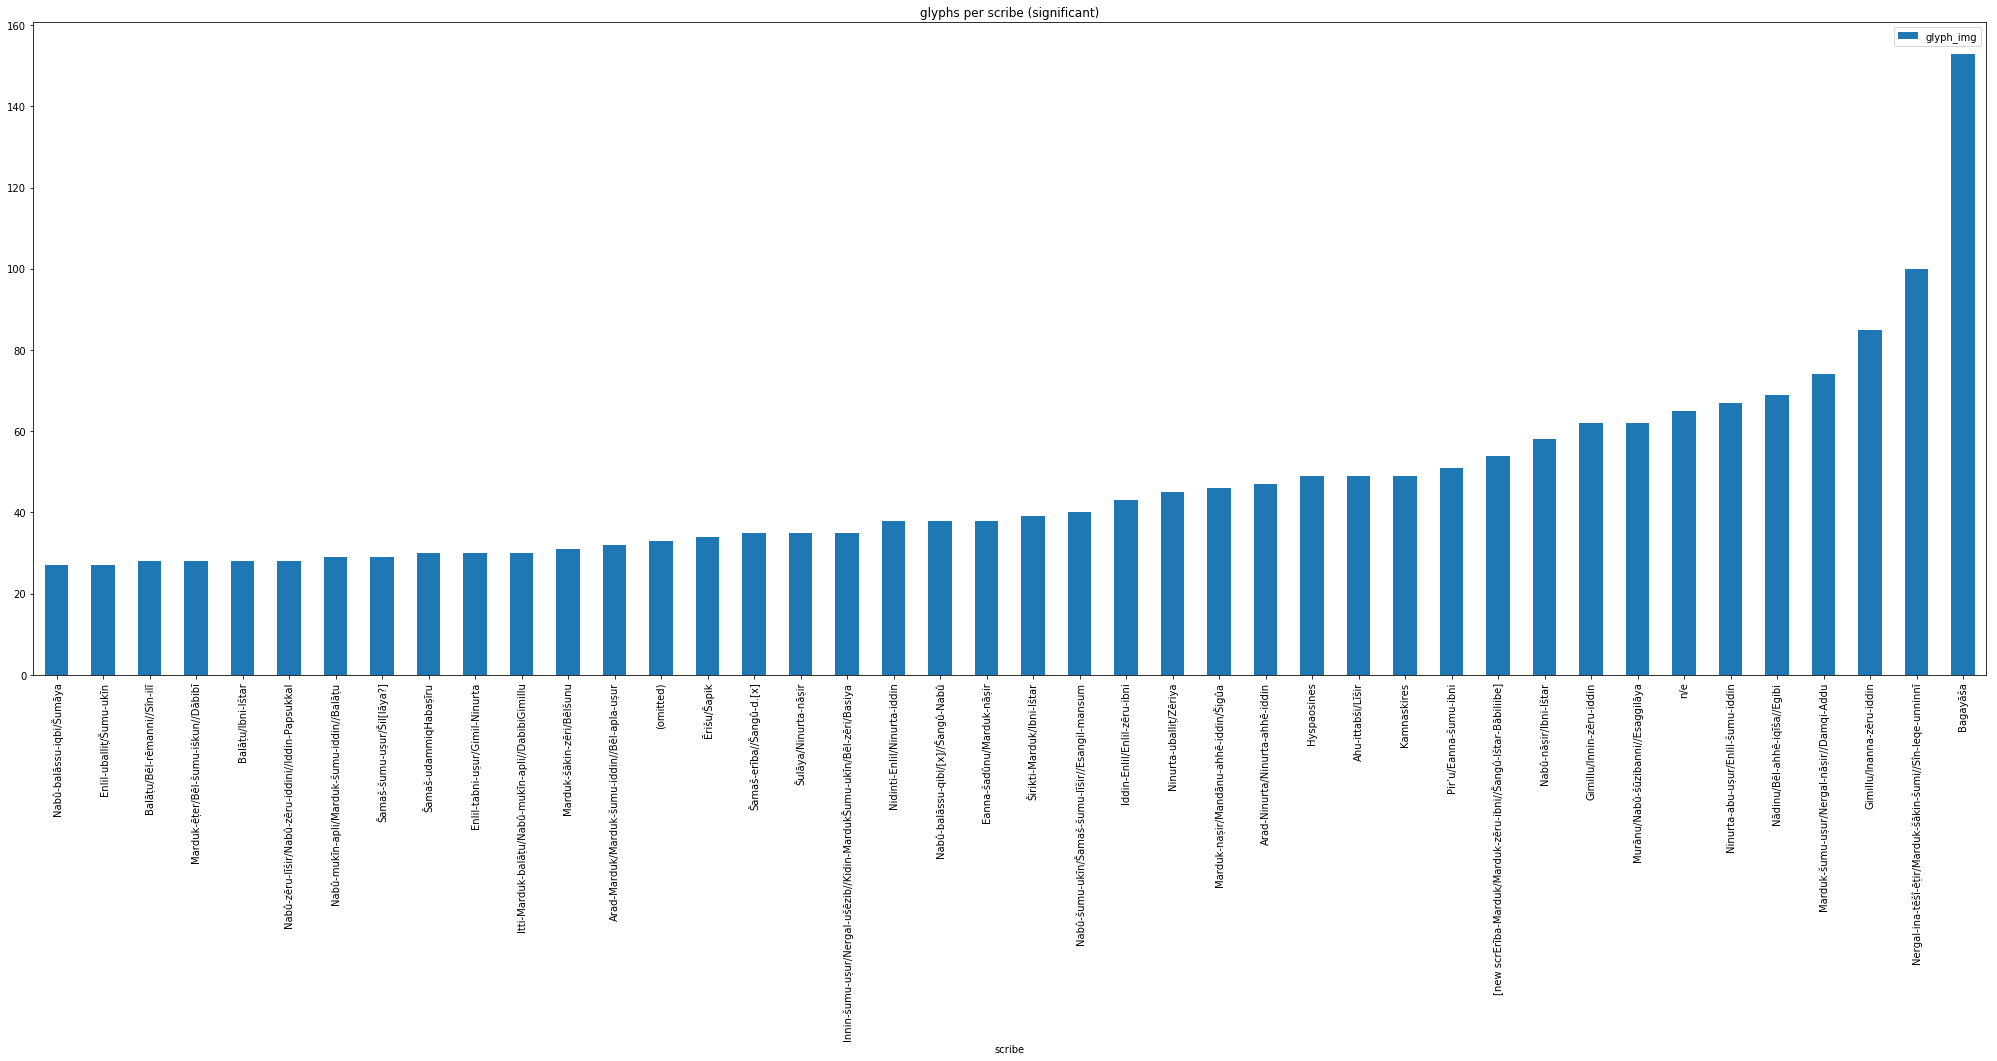

In [204]:
#scribe data:

df17 = df9.groupby(['scribe']).nunique()
df17 = df17.drop(['scribe', 'period', 'year', 'sign'], axis=1)
df17.rename(index=str, columns={"image": "std_sign"})
 
#print(df17)
print("number of scribes: ", df17.count(axis=0)[1])
print("")

%matplotlib inline
df17.to_csv('glyphs_per_scribe.csv')
df17x = pd.read_csv('/Users/IMYV/Desktop/cfdb-django/glyphs_per_scribe.csv', engine='python')
df17x = df17x.sort_values(by=['glyph_img'])
df17x.iloc[125:167].plot(x='scribe', y='glyph_img', kind='bar', figsize=[35,12], title = 'glyphs per scribe (significant)')

df18 = df17.drop(['n/a', 'n/e'])
print("mean glyphs per scribe: ", df18['glyph_img'].mean())
print("min glyphs per scribe: ", df18['glyph_img'].min())
print("max glyphs per scribe: ", df18['glyph_img'].max())
print("")
print("mean tablets per scribe: ", df18['tablet'].mean())
print("min tablets per scribe: ", df18['tablet'].min())
print("max tabets per scribe: ", df18['tablet'].max())

                       tablet  region  glyph_img  std_sign
period                                                    
peri_earlyhellenistic       1       1         14        14
peri_parthian              12       2        541       148
peri_seleukid              19       1        590       145
enb                        40       3        845       171
nb                        112       6       1818       209
achaemenid                159       5       2309       222


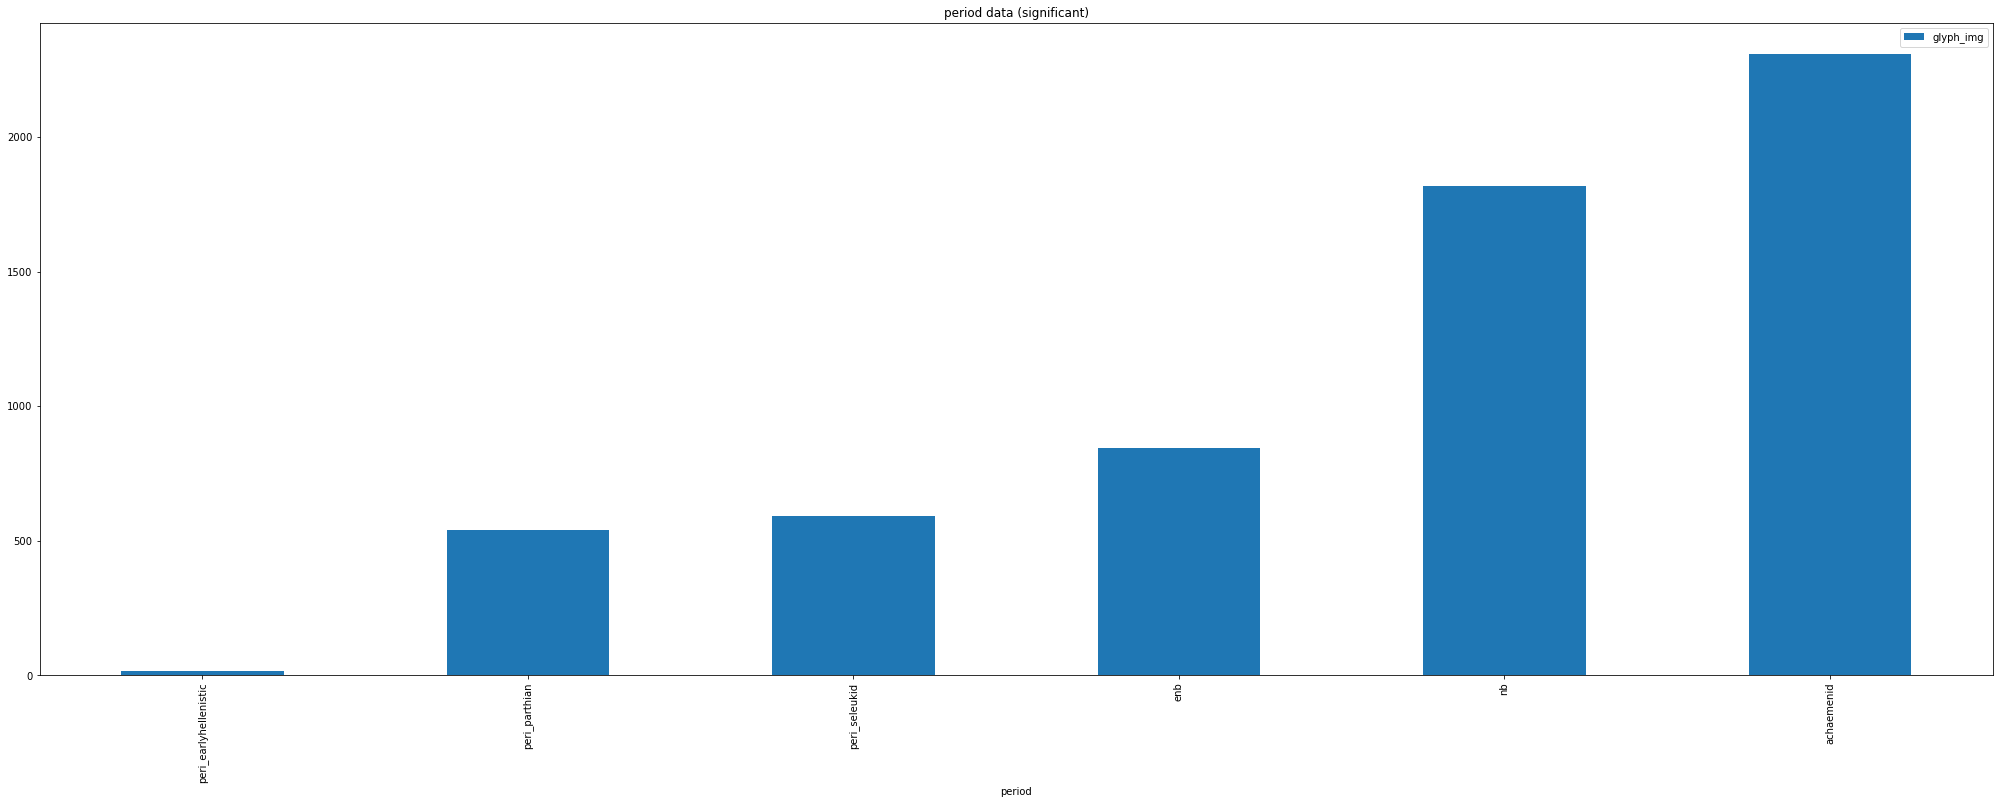

In [205]:
df19 = df9.groupby(['period']).nunique()
df19 = df19.drop(['period', 'scribe', 'year', 'sign'], axis=1)
df19.rename(index=str, columns={"image": "std_sign"})
df19 = df19.sort_values(by=['glyph_img'])
print(df19)
df19.to_csv('period_table.csv')
df19 = pd.read_csv('/Users/IMYV/Desktop/cfdb-django/period_table.csv', engine='python')
df19.plot(x='period', y='glyph_img', kind='bar', figsize=[35,12], title = 'period data (significant)')

In [206]:
print("mean glyphs per period: ", df19['glyph_img'].mean())
print("min glyphs per period: ", df19['glyph_img'].min())
print("max glyphs per period: ", df19['glyph_img'].max())
print("")
print("mean tablets per period: ", df19['tablet'].mean())
print("min tablets per period: ", df19['tablet'].min())
print("max tabets per period: ", df19['tablet'].max())
print("")
print("mean std_signs per period: ", df19['std_sign'].mean())
print("min std_signs per period: ", df19['std_sign'].min())
print("max std_signs per period: ", df19['std_sign'].max())

mean glyphs per period:  1019.5
min glyphs per period:  14
max glyphs per period:  2309

mean tablets per period:  57.1666666667
min tablets per period:  1
max tabets per period:  159

mean std_signs per period:  151.5
min std_signs per period:  14
max std_signs per period:  222
